In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [66]:
# Load Dataset
data = pd.read_csv(r"EV\2-wheeler-EV-bikewale.csv")


In [67]:
data.head()

,review,Used it for,Owned for,Ridden for,rating,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,Comfort,Maintenance cost,Value for Money,Model Name
0,We all checked the bike's capacity to be 150 k...,Daily Commute,Never owned,NaN,1,3.0,4.0,NaN,NaN,NaN,4.0,NaN,1.0,TVS iQube
1,Performance is very poor on this bike. The cha...,Everything,> 1 yr,< 5000 kms,1,3.0,1.0,NaN,1.0,NaN,3.0,NaN,3.0,TVS iQube
2,I purchased this in April 2022 and the sales s...,Daily Commute,< 3 months,< 5000 kms,3,4.0,4.0,NaN,2.0,NaN,5.0,NaN,2.0,TVS iQube
3,If any issues come in scooty parts not availab...,Daily Commute,6 months-1 yr,5000-10000 kms,1,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,TVS iQube
4,Don't buy this vehicle unless you have a near ...,Daily Commute,6 months-1 yr,< 5000 kms,1,3.0,4.0,NaN,1.0,NaN,3.0,NaN,2.0,TVS iQube


In [68]:
print(data.columns)

Index(['review', 'Used it for', 'Owned for', 'Ridden for', 'rating',
       'Visual Appeal', 'Reliability', 'Performance', 'Service Experience',
       'Extra Features', 'Comfort', 'Maintenance cost', 'Value for Money',
       'Model Name'],
      dtype='object')


In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 844 entries, 0 to 843
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   review              797 non-null    object 
 1   Used it for         844 non-null    object 
 2   Owned for           844 non-null    object 
 3   Ridden for          668 non-null    object 
 4   rating              844 non-null    int64  
 5   Visual Appeal       739 non-null    float64
 6   Reliability         716 non-null    float64
 7   Performance         345 non-null    float64
 8   Service Experience  703 non-null    float64
 9   Extra Features      185 non-null    float64
 10  Comfort             530 non-null    float64
 11  Maintenance cost    180 non-null    float64
 12  Value for Money     390 non-null    float64
 13  Model Name          844 non-null    object 
dtypes: float64(8), int64(1), object(5)
memory usage: 92.4+ KB


In [70]:
data.isnull().sum()

review                 47
Used it for             0
Owned for               0
Ridden for            176
rating                  0
Visual Appeal         105
Reliability           128
Performance           499
Service Experience    141
Extra Features        659
Comfort               314
Maintenance cost      664
Value for Money       454
Model Name              0
dtype: int64

In [71]:
data.shape

(844, 14)

In [7]:
# droping review column because didn't contain important information
data.drop(["review"], axis =1, inplace=True)

In [8]:
data.head()

,Used it for,Owned for,Ridden for,rating,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,Comfort,Maintenance cost,Value for Money,Model Name
0,Daily Commute,Never owned,NaN,1,3.0,4.0,NaN,NaN,NaN,4.0,NaN,1.0,TVS iQube
1,Everything,> 1 yr,< 5000 kms,1,3.0,1.0,NaN,1.0,NaN,3.0,NaN,3.0,TVS iQube
2,Daily Commute,< 3 months,< 5000 kms,3,4.0,4.0,NaN,2.0,NaN,5.0,NaN,2.0,TVS iQube
3,Daily Commute,6 months-1 yr,5000-10000 kms,1,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,TVS iQube
4,Daily Commute,6 months-1 yr,< 5000 kms,1,3.0,4.0,NaN,1.0,NaN,3.0,NaN,2.0,TVS iQube


C:\Users\manju\anaconda3\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


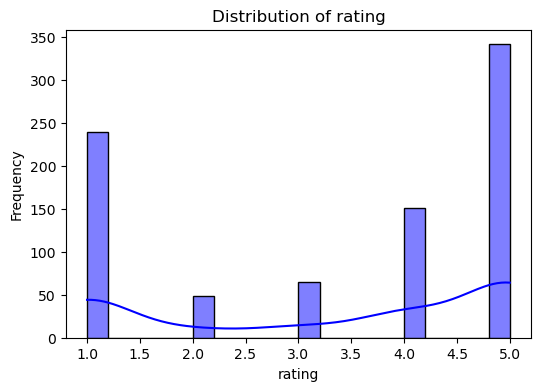

C:\Users\manju\anaconda3\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


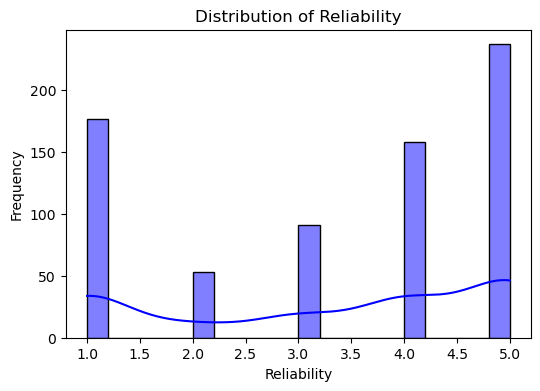

C:\Users\manju\anaconda3\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


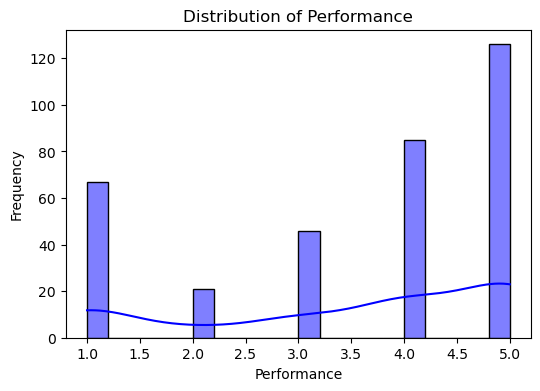

C:\Users\manju\anaconda3\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


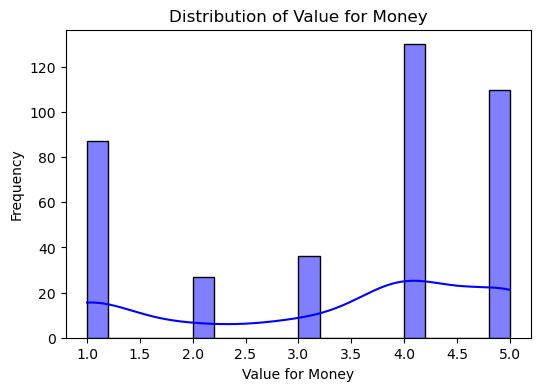

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns


# ============= 1. Plot Histograms =============
# Variables to plot
hist_vars = ['rating', 'Reliability', 'Performance', 'Value for Money']

for var in hist_vars:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[var], kde=True, bins=20, color='blue')
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()




C:\Users\manju\AppData\Local\Temp\ipykernel_19152\582260620.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Model Name', y='Value for Money', data=data, ci=None, palette='viridis')


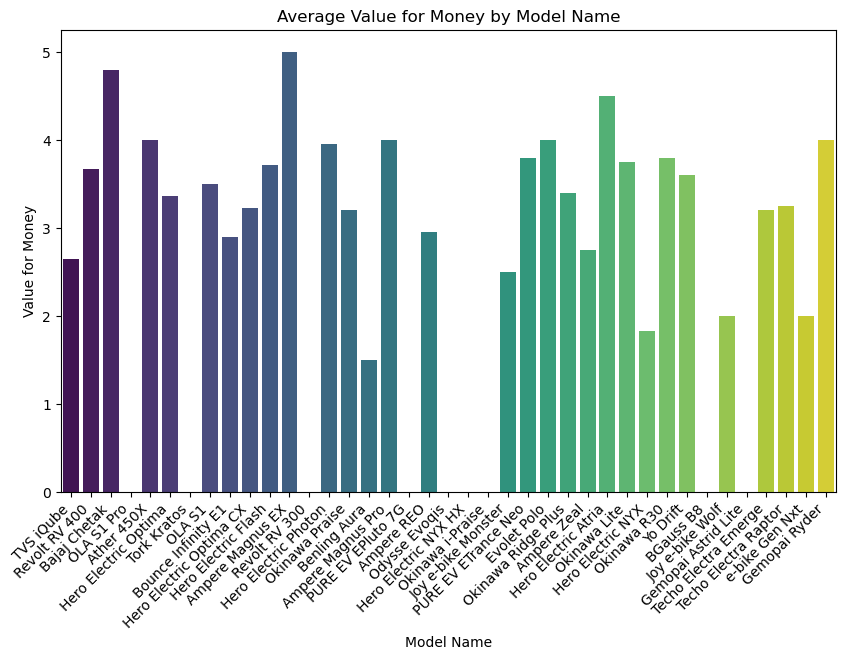

In [10]:
# ============= 2. Bar Charts =============
# Example: Average Value for Money by Model Name
plt.figure(figsize=(10, 6))
sns.barplot(x='Model Name', y='Value for Money', data=data, ci=None, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Average Value for Money by Model Name')
plt.xlabel('Model Name')
plt.ylabel('Value for Money')
plt.show()

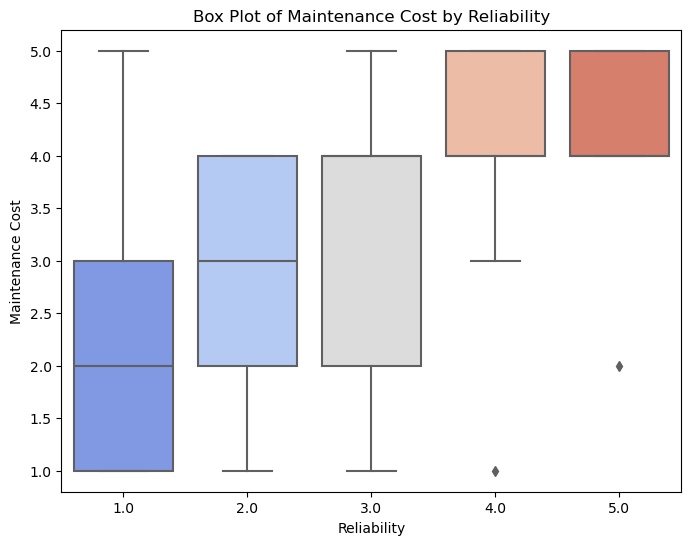

In [11]:
# ============= 3. Box Plots =============
# Example: Box plot of Maintenance Cost by Reliability
plt.figure(figsize=(8, 6))
sns.boxplot(x='Reliability', y='Maintenance cost', data=data, palette='coolwarm')
plt.title('Box Plot of Maintenance Cost by Reliability')
plt.xlabel('Reliability')
plt.ylabel('Maintenance Cost')
plt.show()


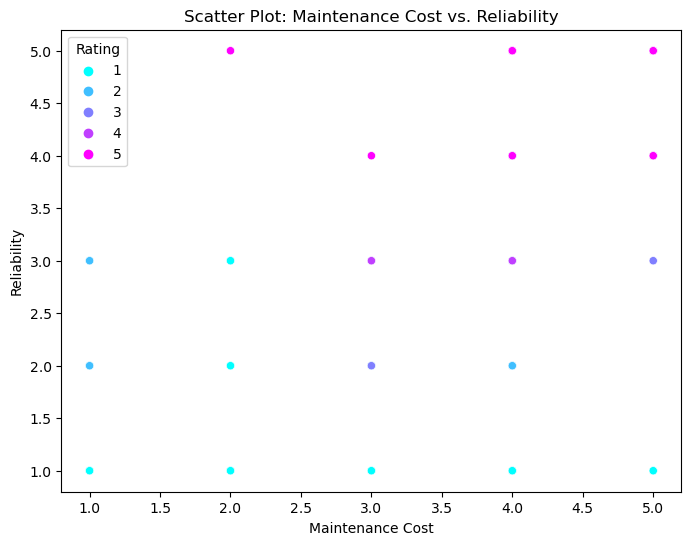

In [12]:
# ============= 4. Scatter Plots =============
# Example: Maintenance cost vs. Reliability
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Maintenance cost', y='Reliability', hue='rating', palette='cool', data=data)
plt.title('Scatter Plot: Maintenance Cost vs. Reliability')
plt.xlabel('Maintenance Cost')
plt.ylabel('Reliability')
plt.legend(title='Rating')
plt.show()

In [13]:
# ============= 1. Compute Correlation Matrix =============
# Selecting numerical variables for correlation analysis
numerical_vars = ['rating', 'Reliability', 'Performance', 'Service Experience', 
                  'Extra Features', 'Comfort', 'Maintenance cost', 'Value for Money']

# Compute the correlation matrix
correlation_matrix = data[numerical_vars].corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                      rating  Reliability  Performance  Service Experience  \
rating              1.000000     0.892309     0.873053            0.874777   
Reliability         0.892309     1.000000     0.855463            0.861297   
Performance         0.873053     0.855463     1.000000            0.813284   
Service Experience  0.874777     0.861297     0.813284            1.000000   
Extra Features      0.877789     0.823643     0.836139            0.824039   
Comfort             0.830538     0.810912     0.814821            0.797147   
Maintenance cost    0.690527     0.711529     0.685040            0.700818   
Value for Money     0.868278     0.824377          NaN            0.836568   

                    Extra Features   Comfort  Maintenance cost  \
rating                    0.877789  0.830538          0.690527   
Reliability               0.823643  0.810912          0.711529   
Performance               0.836139  0.814821          0.685040   
Service Exper

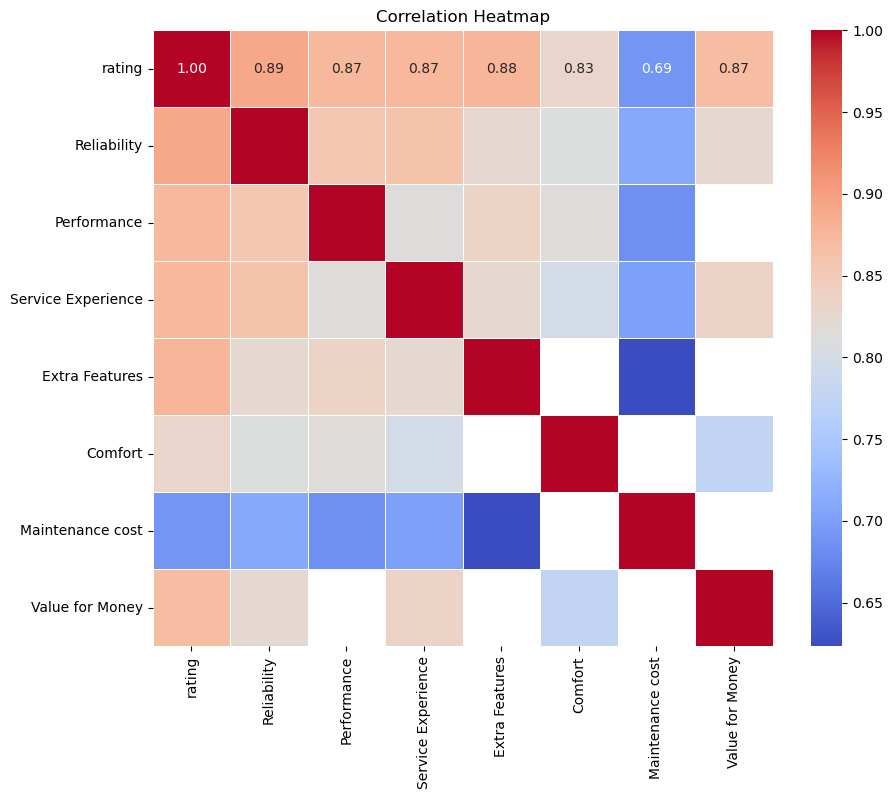

In [62]:
# ============= 2. Heatmap for Correlation Matrix =============
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [15]:

# ============= 3. Insights =============
# Identify pairs of strongly correlated variables (absolute correlation > 0.7)
strong_correlations = correlation_matrix[(correlation_matrix > 0.7) & (correlation_matrix < 1.0)]
print("\nStrong Correlations (absolute correlation > 0.7):")
print(strong_correlations)


Strong Correlations (absolute correlation > 0.7):
                      rating  Reliability  Performance  Service Experience  \
rating                   NaN     0.892309     0.873053            0.874777   
Reliability         0.892309          NaN     0.855463            0.861297   
Performance         0.873053     0.855463          NaN            0.813284   
Service Experience  0.874777     0.861297     0.813284                 NaN   
Extra Features      0.877789     0.823643     0.836139            0.824039   
Comfort             0.830538     0.810912     0.814821            0.797147   
Maintenance cost         NaN     0.711529          NaN            0.700818   
Value for Money     0.868278     0.824377          NaN            0.836568   

                    Extra Features   Comfort  Maintenance cost  \
rating                    0.877789  0.830538               NaN   
Reliability               0.823643  0.810912          0.711529   
Performance               0.836139  0.814821    

In [16]:
# sum of NaN values in each columns

lst2= data.columns
for i in lst2:
    print(i, data[i].isna().sum() )

Used it for 0
Owned for 0
Ridden for 176
rating 0
Visual Appeal 105
Reliability 128
Performance 499
Service Experience 141
Extra Features 659
Comfort 314
Maintenance cost 664
Value for Money 454
Model Name 0


In [24]:
print(data.columns)

Index(['Used it for', 'Owned for', 'Ridden for', 'rating', 'Visual Appeal',
       'Reliability', 'Performance', 'Service Experience', 'Extra Features',
       'Comfort', 'Maintenance cost', 'Value for Money', 'Model Name'],
      dtype='object')


In [27]:
data.head()

,Used it for,Owned for,Ridden for,rating,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,Comfort,Maintenance cost,Value for Money,Model Name
1,Everything,> 1 yr,< 5000 kms,1,3.0,1.0,NaN,1.0,NaN,3.0,NaN,3.0,TVS iQube
2,Daily Commute,< 3 months,< 5000 kms,3,4.0,4.0,NaN,2.0,NaN,5.0,NaN,2.0,TVS iQube
3,Daily Commute,6 months-1 yr,5000-10000 kms,1,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,TVS iQube
4,Daily Commute,6 months-1 yr,< 5000 kms,1,3.0,4.0,NaN,1.0,NaN,3.0,NaN,2.0,TVS iQube
5,Daily Commute,> 1 yr,5000-10000 kms,1,5.0,1.0,NaN,1.0,NaN,5.0,NaN,2.0,TVS iQube


In [32]:
# Inspect unique values in 'Used it for'
print(data['Used it for'].unique())

# Handle missing or inconsistent values
data['Used it for'] = data['Used it for'].fillna('Unknown').str.strip().str.lower()

# Encode categorical columns (if needed for modeling)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Used it for'] = le.fit_transform(data['Used it for'])


['Everything' 'Daily Commute' 'Occasional Commute' 'Leisure Rides' 'Tours']


In [39]:
# Group by 'Used it for' and compute metrics
usage_group = data.groupby('Used it for').agg({
    'Reliability': ['mean', 'count'],
    'rating': 'mean',
    'Value for Money': 'mean',
}).reset_index()

# Rename columns for better readability
usage_group.columns = ['Used it for', 'Avg Reliability', 'Count', 'Avg Rating', 'Avg Value for Money']

# Display results
print(usage_group)


   Used it for  Avg Reliability  Count  Avg Rating  Avg Value for Money
0            0         3.185771    506    3.232053             3.267857
1            1         3.857143    140    3.937500             4.112903
2            2         3.937500     16    3.750000             3.875000
3            3         2.916667     48    3.017857             2.914286
4            4         2.800000      5    3.500000             3.750000


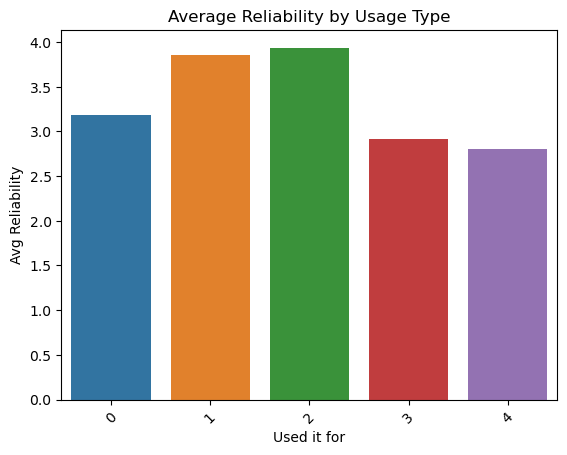

In [41]:
sns.barplot(x='Used it for', y='Avg Reliability', data=usage_group)
plt.title('Average Reliability by Usage Type')
plt.xticks(rotation=45)
plt.show()
